# Modeling 1 - Exercises

Using saas.csv or log data from API usage:

1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum.
2. Forecast, plot and evaluate using each of the 4 parametric based methods we discussed:
 - Simple Average
 - Moving Average
 - Holt's Linear Trend Model
 - Based on previous year/month/etc., this is up to you.

In [4]:
# data manipulation 
import numpy as np
import pandas as pd

from datetime import datetime
import itertools as it

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.api as sm
from statsmodels.tsa.ar_model import AR

from sklearn.model_selection import TimeSeriesSplit
from sklearn import metrics

import math

# data visualization 
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
%matplotlib inline

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import prepare
import acquire

In [6]:
df = pd.read_csv('saas.csv')

In [7]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [8]:
df.isnull().sum()

Month_Invoiced       0
Customer_Id          0
Invoice_Id           0
Subscription_Type    0
Amount               0
dtype: int64

In [9]:
df.dtypes

Month_Invoiced        object
Customer_Id            int64
Invoice_Id             int64
Subscription_Type    float64
Amount               float64
dtype: object

In [14]:
df = df.rename(columns={'Month_Invoiced':'month_invoiced', 'Customer_Id':'cust_id', 'Invoice_Id':'invoice_id', 'Subscription_Type':'subscription_type', 'Amount':'amount'})




In [12]:
df.head()

,month_invoiced,cust_id,invoice_id,subscription_type,amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [13]:
df.amount.value_counts()

0.0     496410
5.0     178212
10.0     70706
15.0     26474
20.0     18656
Name: amount, dtype: int64

In [17]:
df.month_invoiced = pd.to_datetime(df.month_invoiced)
df = df.set_index('month_invoiced')

In [24]:
target_vars = ['amount']

df1 = df[target_vars].resample('D').sum()

df2 = df[target_vars].resample('M').sum()

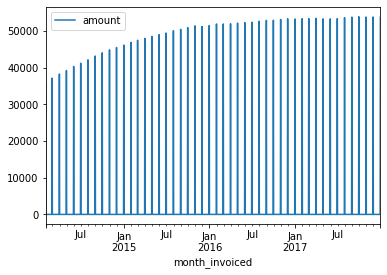

In [25]:
df[target_vars].resample('D').sum().plot()

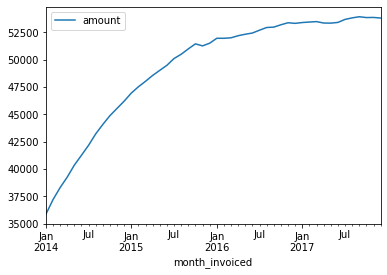

In [26]:
df[target_vars].resample('M').sum().plot()

In [27]:
train_size = int(len(df) * 0.66)
train, test = df[0:train_size], df[train_size:len(df)]
print('Observations: %d' % (len(df)))
print('Training Observations: %d' % (len(train)))
print('Testing Observations: %d' % (len(test)))

Observations: 790458
Training Observations: 521702
Testing Observations: 268756


In [28]:
train.head()

,cust_id,invoice_id,subscription_type,amount
month_invoiced,,,,
2014-01-31,1000000,5000000,0.0,0.0
2014-01-31,1000001,5000001,2.0,10.0
2014-01-31,1000002,5000002,0.0,0.0
2014-01-31,1000003,5000003,0.0,0.0
2014-01-31,1000004,5000004,1.0,5.0


In [29]:
test.head()

,cust_id,invoice_id,subscription_type,amount
month_invoiced,,,,
2016-06-30,1018549,5521702,3.0,15.0
2016-06-30,1018553,5521703,0.0,0.0
2016-06-30,1018556,5521704,0.0,0.0
2016-06-30,1018557,5521705,0.0,0.0
2016-06-30,1018558,5521706,4.0,20.0


In [38]:
yhat = pd.DataFrame(dict(amount=test.amount))
yhat['amount'] = train.amount[-1]

In [36]:
yhat['amount'] = train.amount.mean()